In [1]:
from __future__ import print_function
import datetime
import os.path
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
from google.oauth2.credentials import Credentials

# If modifying these scopes, delete the file token.json.
SCOPES = ['https://www.googleapis.com/auth/calendar.readonly']



"""Shows basic usage of the Google Calendar API.
Prints the start and name of the next 10 events on the user's calendar.
"""
creds = None
# The file token.json stores the user's access and refresh tokens, and is
# created automatically when the authorization flow completes for the first
# time.
if os.path.exists('token.json'):
    creds = Credentials.from_authorized_user_file('token.json', SCOPES)
#     If there are no (valid) credentials available, let the user log in.
if not creds or not creds.valid:
    if creds and creds.expired and creds.refresh_token:
        creds.refresh(Request())
    else:
        flow = InstalledAppFlow.from_client_secrets_file(
            'credentials.json', SCOPES)
        creds = flow.run_local_server(port=0)
    # Save the credentials for the next run
    with open('token.json', 'w') as token:
        token.write(creds.to_json())

service = build('calendar', 'v3', credentials=creds)


Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=660949318707-vosjllecbjv7m5m65pm1vvjd3ddsj6n9.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A59796%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcalendar.readonly&state=QUQSKl4jp8I6vwhnhgmJy1mJT1Mc2H&access_type=offline


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [3]:
# Call the Calendar API
now = datetime.datetime.now().isoformat() + '-04:00' 
starttime = "2021-01-01T00:00:00-04:00"
ins_id = {'DLS':'33rjq5pekdsojjvq1uh79h0h4k@group.calendar.google.com', 'UV':'ekgroup21@gmail.com'}

#     calendarlist = service.calendarList().list().execute().get('items',[])
#     print (calendarlist)

log = []
print('Getting the events')
for ins in ins_id:
    events_result = service.events().list(calendarId=ins_id[ins], timeMax=now, timeMin=starttime,
                                    singleEvents=True,
                                    orderBy='startTime').execute()
    events = events_result.get('items', [])
#   print (events)
    for event in events:
        user = event.get('summary','Unknown')
        start = event['start'].get('dateTime', event['start'].get('date'))
        end = event['end'].get('dateTime', event['end'].get('date'))
        log.append([ins, user, start, end])
df = pd.DataFrame(log, columns=['Instrument','User','Start','End'])
df['Duration'] = pd.to_datetime(df['End']) - pd.to_datetime(df['Start'])
df.tail(10)

Getting the events


,Instrument,User,Start,End,Duration
238,UV,Taylor,2021-09-21T17:30:00-04:00,2021-09-21T18:30:00-04:00,01:00:00
239,UV,Taylor,2021-09-22T09:00:00-04:00,2021-09-22T11:00:00-04:00,02:00:00
240,UV,Yingshan,2021-09-22T11:30:00-04:00,2021-09-22T12:00:00-04:00,00:30:00
241,UV,Taylor,2021-09-22T14:00:00-04:00,2021-09-22T15:00:00-04:00,01:00:00
242,UV,Taylor,2021-09-22T18:00:00-04:00,2021-09-22T18:30:00-04:00,00:30:00
243,UV,Taylor,2021-09-23T10:00:00-04:00,2021-09-23T11:00:00-04:00,01:00:00
244,UV,Monica A,2021-09-23T16:30:00-04:00,2021-09-23T18:00:00-04:00,01:30:00
245,UV,Monica A,2021-09-27T13:30:00-04:00,2021-09-27T15:30:00-04:00,02:00:00
246,UV,Taylor,2021-10-05T15:00:00-04:00,2021-10-05T18:00:00-04:00,03:00:00
247,UV,Taylor,2021-10-06T15:00:00-04:00,2021-10-06T18:00:00-04:00,03:00:00


In [65]:
import re
ekg_regex = {r'^yin.*':'yingshan',r'^tay.*':'taylor',r'^ell.*':'ellie',r'^hua.*':'huachen','^ysm':'yingshan',
       r'^nan.*':'nancy',r'^zic.*':'zicor',r'^mon.*\sy.*':'monicaY',r'^sof.*':'sofia',r'^alb.*':'albert',
       r'^val.*':'valentina',r'^mar.*':'mariya',r'^sin.*':'sina',r'^mon.*\sa.*':'monicaA',r'^mon.*\sm.*':'monicaM',r'^mah.*':'mahshid',r'^ily.*':'ilya'}
ekg = ['yingshan','taylor','ellie','huachen','nancy','zicor','monicay','sofia','albert','valentina','mariya','sina','monicaa','monicam','mahshid','ilya','monica']
walker = ['caroline','nashmia','sam (walker lab)', 'logan']
winnik = ['loyrn','loryn']
wilson = ['philippe']

df['User'] = df['User'].str.lower()
df.replace(regex=ekg_regex, inplace=True)
df

,Instrument,User,Start,End,Duration,Group
0,DLS,yingshan,2021-01-04T19:00:00-05:00,2021-01-04T20:00:00-05:00,01:00:00,ekg
1,DLS,yingshan,2021-01-05T13:30:00-05:00,2021-01-05T15:15:00-05:00,01:45:00,ekg
2,DLS,mahshid,2021-01-07T18:00:00-05:00,2021-01-07T19:00:00-05:00,01:00:00,ekg
3,DLS,mahshid,2021-01-10T20:15:00-05:00,2021-01-10T21:15:00-05:00,01:00:00,ekg
4,DLS,yingshan,2021-01-11T14:00:00-05:00,2021-01-11T15:00:00-05:00,01:00:00,ekg
...,...,...,...,...,...,...
243,UV,taylor,2021-09-23T10:00:00-04:00,2021-09-23T11:00:00-04:00,01:00:00,ekg
244,UV,monicaa,2021-09-23T16:30:00-04:00,2021-09-23T18:00:00-04:00,01:30:00,ekg
245,UV,monicaa,2021-09-27T13:30:00-04:00,2021-09-27T15:30:00-04:00,02:00:00,ekg
246,UV,taylor,2021-10-05T15:00:00-04:00,2021-10-05T18:00:00-04:00,03:00:00,ekg


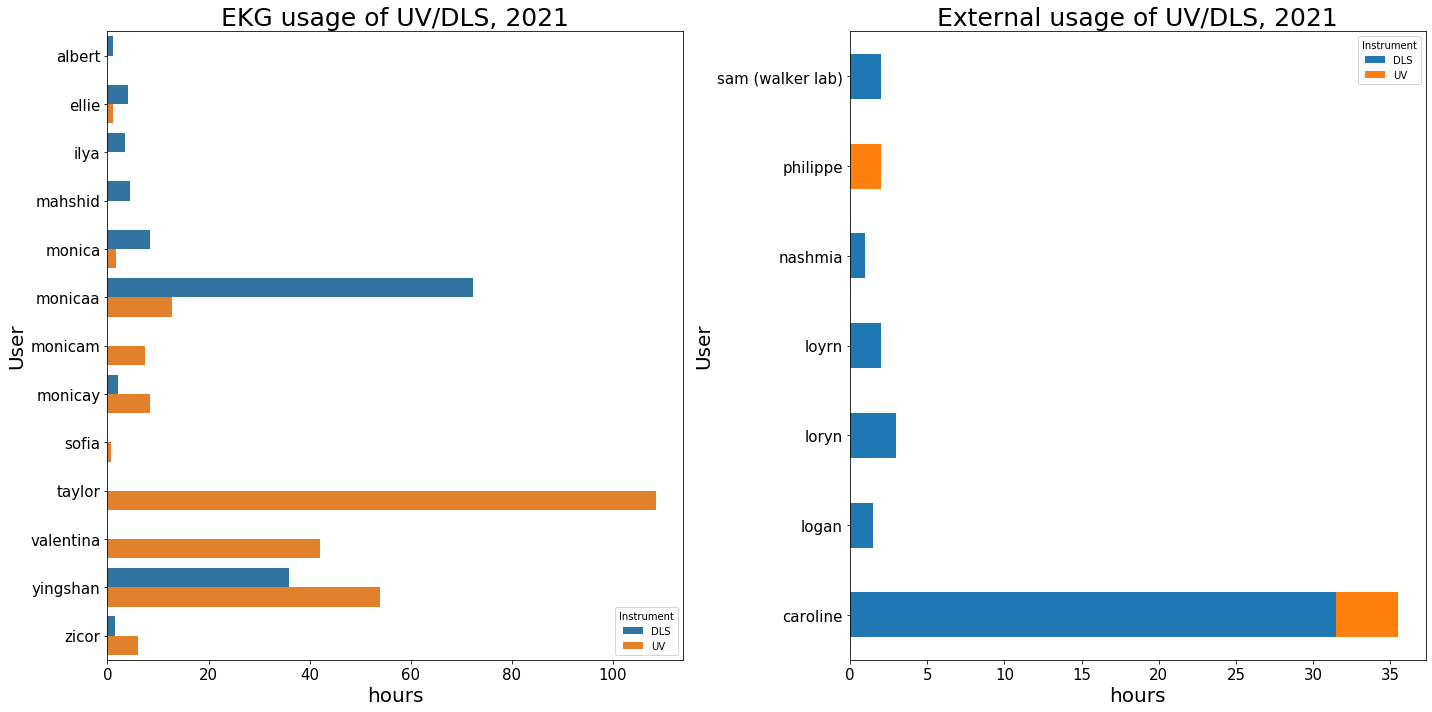

In [71]:
user_to_group = {**{x:'ekg' for x in ekg}, **{x:'walker' for x in walker}, **{x:'winnik' for x in winnik}, **{x:'wilson' for x in wilson}}
df['Group'] = df['User'].map(user_to_group)
df.head()

ekg_usage = df[df['Group'] == 'ekg']
# ekg_usage['User'].unique()
ekg_hours = ekg_usage.groupby(['User','Instrument'])['Duration'].sum().dt.total_seconds() / 3600
ekg_hours_sns = ekg_hours.reset_index()
ekg_hours_barh = ekg_hours.unstack()
# ekg_hours_barh2 = ekg_hours_sns.pivot(index='User', columns='Instrument', values='Duration')
# ekg_hours_barh2

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
sns.barplot(y='User', x='Duration', hue='Instrument',data=ekg_hours_sns, ax=ax1)
ax1.set_title('EKG usage of UV/DLS, 2021', fontsize=25)
ax1.set_xlabel('hours', fontsize=20)
ax1.set_ylabel('User', fontsize=20)
ax1.tick_params(labelsize = 15)

# ax2 = fig.add_subplot(212)
# ekg_hours_barh2.plot.barh(ax=ax2)
# ax2.set_title('EKG usage of UV/DLS, 2021')
# ax2.set_xlabel('hours')

external_usage = df[df['User'].isin(walker + winnik + wilson)]
external_hours = external_usage.groupby(['User','Instrument'])['Duration'].sum().dt.total_seconds() / 3600


ax2 = fig.add_subplot(122)
external_hours.unstack().plot.barh(ax=ax2, stacked=True)
ax2.set_title('External usage of UV/DLS, 2021', fontsize=25)
ax2.set_xlabel('hours', fontsize=20)
ax2.set_ylabel('User', fontsize=20)
ax2.tick_params(labelsize = 15)


fig.tight_layout()

In [91]:
usage_tot = df.groupby(['Group','Instrument'])['Duration'].sum().unstack()
usage_tot.UV = usage_tot['UV'].dt.total_seconds() / 3600
usage_tot.DLS = usage_tot['DLS'].dt.total_seconds() / 3600
df_unknown_users = df[df["Group"].isnull()]
unknown_usage = df_unknown_users.groupby(['Instrument', 'User'], as_index=False)['User', 'Duration'].sum()
unknown_usage['Duration'] = unknown_usage['Duration'].dt.total_seconds() / 3600 
unknown_usage = unknown_usage.pivot(index='User', columns='Instrument', values='Duration')
usage_tot = pd.concat([usage_tot, unknown_usage])
usage_tot
usage_tot.index.name = 'Group'
usage_tot.fillna(0)


<ipython-input-91-4effdaeec4e9>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  unknown_usage = df_unknown_users.groupby(['Instrument', 'User'], as_index=False)['User', 'Duration'].sum()


Instrument,DLS,UV
Group,,
ekg,133.25,242.75
walker,36.00,4.00
wilson,0.00,2.00
winnik,5.00,0.00
currently unavailable,0.00,96.50
dls-vahid,4.00,0.00
monica,2.00,0.00
monica i. training,1.00,0.00
sam (walker lab),1.50,0.00
